## Evaluation



In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
def initialize_dicts(pred_file, true_file):

    pred_dict = {}
    true_dict = {}

    # Read contents of TC.labels_pred.txt
    with open(pred_file, "r") as pred_f:
        pred_reader = csv.reader(pred_f, delimiter="\t")
        for row in pred_reader:
            id_ = row[0]
            technique = row[1]
            if id_ not in pred_dict:
                pred_dict[id_] = [technique]
            else:
                pred_dict[id_].append(technique)

    # Read contents of TC.labels_true.txt
    with open(true_file, "r") as true_f:
        true_reader = csv.reader(true_f, delimiter="\t")
        for row in true_reader:
            id_ = row[0]
            technique = row[1]
            if id_ not in true_dict:
                true_dict[id_] = [technique]
            else:
                true_dict[id_].append(technique)
    
    return pred_dict, true_dict

In [15]:
def generate_classification_report(true_dict, pred_dict, labels):

    true_labels = []
    predicted_labels = []

    # Iterate through the keys of the true dictionary
    for key in true_dict.keys():
        # Check if the key exists in both dictionaries
        if key in pred_dict:
            # Append true and predicted labels
            true_labels.extend(true_dict[key])
            predicted_labels.extend(pred_dict[key])

    # Generate classification report
    report = classification_report(true_labels, predicted_labels)
    
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)
    # Convert confusion matrix to DataFrame for better readability
    conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=labels)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()
    
    return report

In [16]:
class_names = ["Doubts_government", 
               "Doubts_Army",
               "Doubts_media",
               "Doubts_partners",
               "Doubts_other",
               "Black_White",
               "Emotion_Fear",
               "Emotion_Anger",
               "Emotion_Hate_Disgust",
               "Emotion_other"]

#### Technical level 10 classes no weight

C:\Users\Ната\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ната\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ната\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

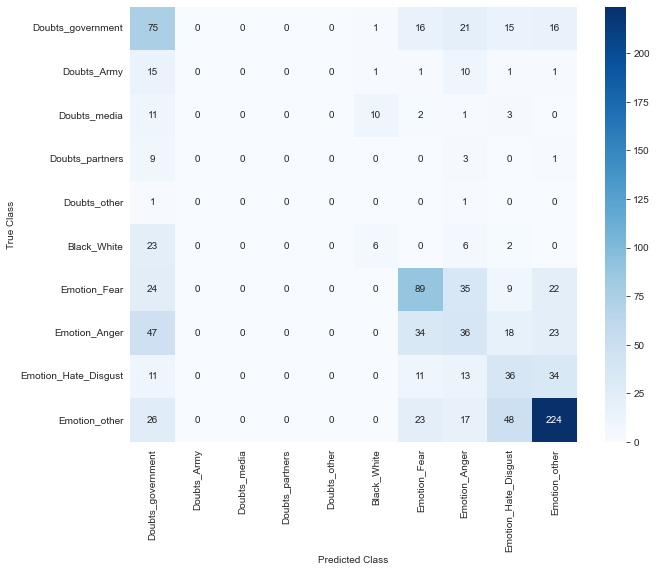

                      precision    recall  f1-score   support

         Black_White       0.33      0.16      0.22        37
         Doubts_Army       0.00      0.00      0.00        29
   Doubts_government       0.31      0.52      0.39       144
        Doubts_media       0.00      0.00      0.00        27
        Doubts_other       0.00      0.00      0.00         2
     Doubts_partners       0.00      0.00      0.00        13
       Emotion_Anger       0.25      0.23      0.24       158
        Emotion_Fear       0.51      0.50      0.50       179
Emotion_Hate_Disgust       0.27      0.34      0.30       105
       Emotion_other       0.70      0.66      0.68       338

            accuracy                           0.45      1032
           macro avg       0.24      0.24      0.23      1032
        weighted avg       0.44      0.45      0.44      1032


In [19]:
pred_file = "datasets/TC.labels_pred_10_no_weights.txt"
true_file = "datasets/TC.labels_true.txt"

pred_dict, true_dict = initialize_dicts(pred_file, true_file)
report = generate_classification_report(true_dict, pred_dict, class_names)
print(report)

#### Technical level 10 classes with weights

C:\Users\Ната\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ната\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ната\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

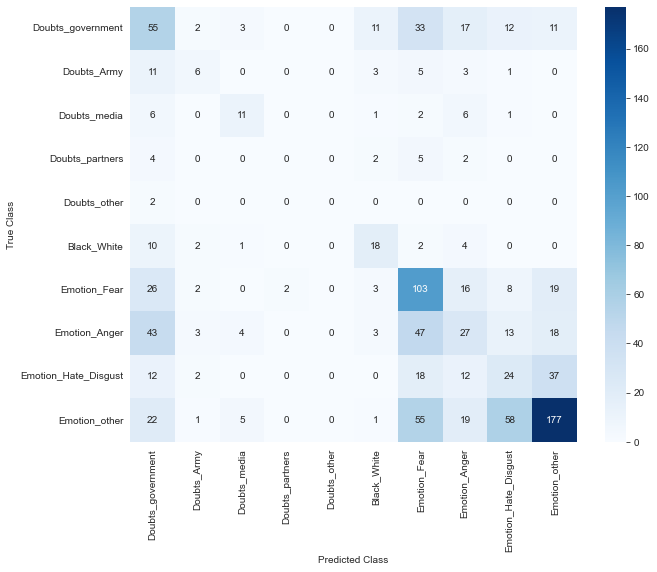

                      precision    recall  f1-score   support

         Black_White       0.43      0.49      0.46        37
         Doubts_Army       0.33      0.21      0.26        29
   Doubts_government       0.29      0.38      0.33       144
        Doubts_media       0.46      0.41      0.43        27
        Doubts_other       0.00      0.00      0.00         2
     Doubts_partners       0.00      0.00      0.00        13
       Emotion_Anger       0.25      0.17      0.20       158
        Emotion_Fear       0.38      0.58      0.46       179
Emotion_Hate_Disgust       0.21      0.23      0.22       105
       Emotion_other       0.68      0.52      0.59       338

            accuracy                           0.41      1032
           macro avg       0.30      0.30      0.29      1032
        weighted avg       0.42      0.41      0.41      1032


In [20]:
pred_file = "datasets/TC.labels_pred_10_with_weights.txt"

pred_dict, true_dict = initialize_dicts(pred_file, true_file)
report_with_weights = generate_classification_report(true_dict, pred_dict, class_names)
print(report_with_weights)

#### Technical level 10 classes no weights with upsampling (in train)

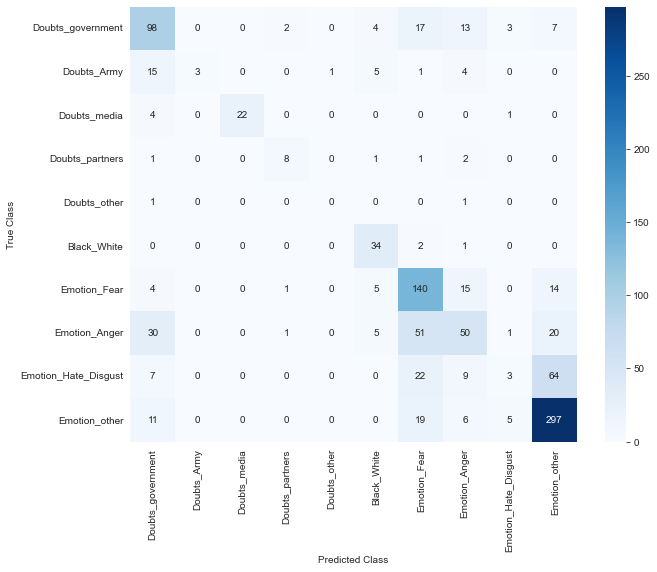

                      precision    recall  f1-score   support

         Black_White       0.63      0.92      0.75        37
         Doubts_Army       1.00      0.10      0.19        29
   Doubts_government       0.57      0.68      0.62       144
        Doubts_media       1.00      0.81      0.90        27
        Doubts_other       0.00      0.00      0.00         2
     Doubts_partners       0.67      0.62      0.64        13
       Emotion_Anger       0.50      0.32      0.39       158
        Emotion_Fear       0.55      0.78      0.65       179
Emotion_Hate_Disgust       0.23      0.03      0.05       105
       Emotion_other       0.74      0.88      0.80       338

            accuracy                           0.63      1032
           macro avg       0.59      0.51      0.50      1032
        weighted avg       0.60      0.63      0.59      1032


In [21]:
pred_file = "datasets/TC.labels_pred_10_no_weight_up.txt"

pred_dict, true_dict = initialize_dicts(pred_file, true_file)
report_no_weights_up = generate_classification_report(true_dict, pred_dict, class_names)
print(report_no_weights_up)

#### Technical level 10 classes with weights with upsampling (in train)

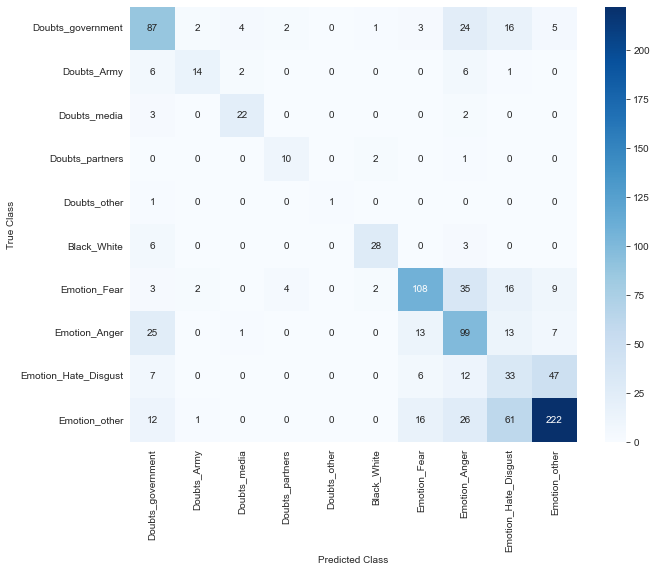

                      precision    recall  f1-score   support

         Black_White       0.85      0.76      0.80        37
         Doubts_Army       0.74      0.48      0.58        29
   Doubts_government       0.58      0.60      0.59       144
        Doubts_media       0.76      0.81      0.79        27
        Doubts_other       1.00      0.50      0.67         2
     Doubts_partners       0.62      0.77      0.69        13
       Emotion_Anger       0.48      0.63      0.54       158
        Emotion_Fear       0.74      0.60      0.66       179
Emotion_Hate_Disgust       0.24      0.31      0.27       105
       Emotion_other       0.77      0.66      0.71       338

            accuracy                           0.60      1032
           macro avg       0.68      0.61      0.63      1032
        weighted avg       0.64      0.60      0.62      1032


In [25]:
pred_file = "datasets/TC.labels_pred_10_with_weight_up.txt"

pred_dict, true_dict = initialize_dicts(pred_file, true_file)
report_with_weights_up = generate_classification_report(true_dict, pred_dict, class_names)
print(report_with_weights_up)

In [26]:
print("Classification report TC 10 no weights")
print(report)
print("_______________________________________________________")
print("Classification report TC 10 with weights")
print(report_with_weights)
print("_______________________________________________________")
print("Classification report TC 10 no weights with upsampling")
print(report_no_weights_up)
print("_______________________________________________________")
print("Classification report TC 10 with weights with upsampling")
print(report_with_weights_up)

Classification report TC 10 no weights
                      precision    recall  f1-score   support

         Black_White       0.33      0.16      0.22        37
         Doubts_Army       0.00      0.00      0.00        29
   Doubts_government       0.31      0.52      0.39       144
        Doubts_media       0.00      0.00      0.00        27
        Doubts_other       0.00      0.00      0.00         2
     Doubts_partners       0.00      0.00      0.00        13
       Emotion_Anger       0.25      0.23      0.24       158
        Emotion_Fear       0.51      0.50      0.50       179
Emotion_Hate_Disgust       0.27      0.34      0.30       105
       Emotion_other       0.70      0.66      0.68       338

            accuracy                           0.45      1032
           macro avg       0.24      0.24      0.23      1032
        weighted avg       0.44      0.45      0.44      1032

_______________________________________________________
Classification report TC 10 with w